### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [904]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [905]:
data = pd.read_csv('data/coupons.csv')

In [906]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

      2a. Get the datatypes of all columns.

In [907]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

        2b. Plot the number of missing values for each column.

<Axes: >

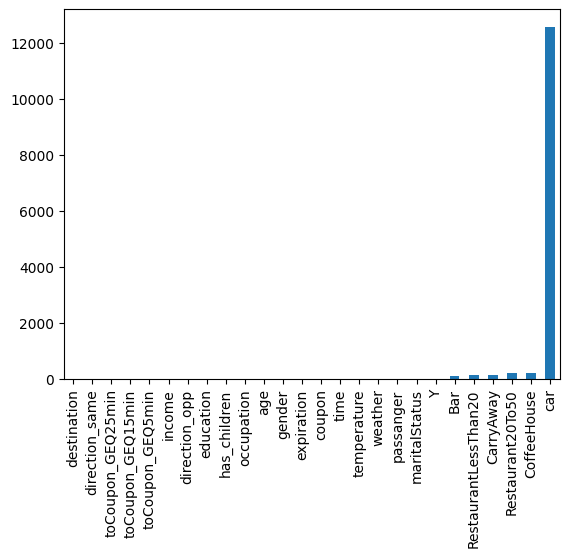

In [908]:
data.isnull().sum().sort_values().plot(kind = 'bar')

      2c. Get the count of all missing values per column.

In [909]:
missing_values = data.isna().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

      3a. The column 'car' is excluded, since is does not have a value in the majority of entries.

In [910]:
# Exclude the 'car' column
data_clean = data.drop(columns='car')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

      3b. Only a few entries have missing values in other columns. These incomplete entries are excluded.

In [911]:
# Exclude other data entries with missing values
data_clean = data_clean.dropna()

      3c. What percentage of original data entries is retained after cleaning up the data?

In [912]:
original_total = data.shape[0]
clean_total = data_clean.shape[0]
percentage_kept = round(clean_total / original_total * 100)
print("After data cleaning,",percentage_kept,"% of data entries remain in the dataset.")

After data cleaning, 95 % of data entries remain in the dataset.


      3d. The column 'age' contains non-numerical entries, this is cleaned up to facilitate analysis.
      Also, a typo in the title of one of the columns is fixed.

In [913]:
# Convert text entries in 'age' column to numerical representation to facilitate analysis.

data_clean.loc[:,'age'] = data_clean['age'].replace({'50plus': '51', 'below21': '20'})
data_clean.loc[:,'age'] = pd.to_numeric(data_clean['age'])

# Typo in column 'passenger' is fixed.
data_clean.rename(columns = {'passanger' : 'passenger'}, inplace = True)

# Replace nine 'income' string value ranges with numerical categories.
data_clean.loc[:,'income'] = data_clean['income'].replace({'Less than $12500': '1', '$12500 - $24999': '2', '$25000 - $37499': '3' , '$37500 - $49999': '4', '$50000 - $62499': '5', '$62500 - $74999': '6', '$75000 - $87499': '7', '$87500 - $99999': '8', '$100000 or More': '9'})
data_clean.loc[:,'income'] = pd.to_numeric(data_clean['income'])


4. What proportion of the total observations chose to accept the coupon?



In [914]:
coupons_accepted = data_clean[data_clean['Y'] == 1].shape[0]
coupons_accepted_per = round(coupons_accepted / clean_total * 100)
print(coupons_accepted_per, "% of drivers accepted a coupon.")

57 % of drivers accepted a coupon.


5. Use a bar plot to visualize the `coupon` column.

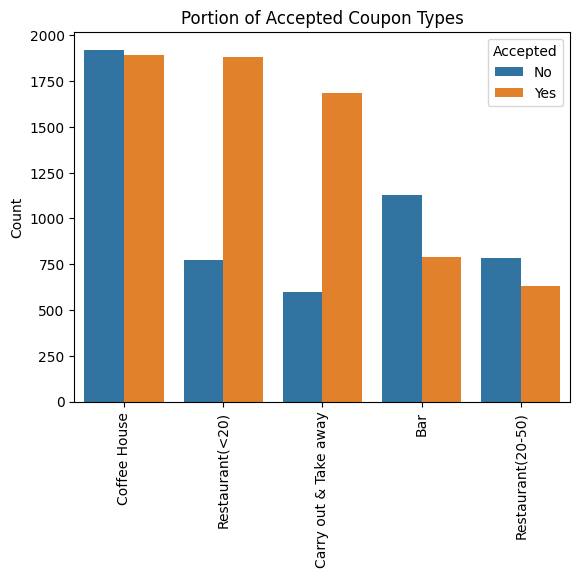

In [915]:
# Plot the histogram using countplot(), sort by number of accepted coupons.
sns.countplot(data_clean, x='coupon', hue='Y', order = data_clean['coupon'].value_counts().index)
plt.title('Portion of Accepted Coupon Types')
plt.legend(title='Accepted', labels=['No', 'Yes'])

# Format plot
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.savefig('images/coupon_categories_acceptance.png')

6. Use a histogram to visualize the temperature column.

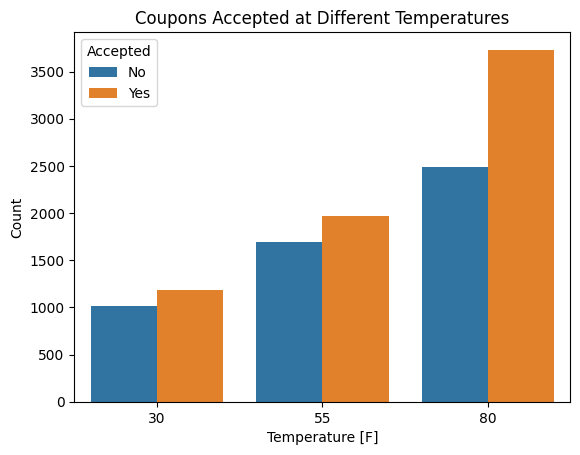

In [916]:
sns.countplot(data_clean, x='temperature', hue='Y')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.title('Coupons Accepted at Different Temperatures')
plt.xlabel('Temperature [F]')
plt.ylabel('Count')
plt.savefig('images/temperature_acceptance.png')

Summary of first part

The most accepted types of coupons were for lower-priced restaurants or take-away orders, while bar coupons were the ones that were most rejected. Higher outside temperatures increased coupon acceptance rates.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [917]:
bar_coupons = data_clean[data_clean['coupon'] == 'Bar']
print(bar_coupons.shape)

(1913, 25)


2. What proportion of bar coupons were accepted?


In [918]:
# DF of accepted the bar coupons
bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1]

# Calculate proportion of accepted bar coupons
bar_coupons_accepted_per = round((bar_coupons_accepted.shape[0] / bar_coupons.shape[0]) * 100)
print("Only", bar_coupons_accepted_per,"% of people who were offered a coupon for a bar accepted it.")

Only 41 % of people who were offered a coupon for a bar accepted it.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [919]:
# Count of bar visit frequencies in people who received a bar coupon
print(bar_coupons['Bar'].value_counts())

# Count of bar visit frequencies in people who accepted a bar coupon
print(bar_coupons_accepted['Bar'].value_counts())

few_bar_visits = '(Bar == "never") or (Bar == "less1") or (Bar == "1~3")'
frequent_bar_visits = '(Bar == "4~8") or (Bar == "gt8")'

few_acceptance_per = round((((bar_coupons_accepted.query(few_bar_visits)).shape[0])/(bar_coupons.query(few_bar_visits)).shape[0])*100)
frequent_acceptance_per = round((((bar_coupons_accepted.query(frequent_bar_visits)).shape[0])/(bar_coupons.query(frequent_bar_visits)).shape[0])*100)

print("Drivers who visit bars more than four times per month accepted bar coupons in",frequent_acceptance_per,"% of the cases, while drivers who visit bars less often only accepted in",few_acceptance_per,"% of cases.")


Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64
Bar
less1    247
1~3      245
never    149
4~8      114
gt8       33
Name: count, dtype: int64
Drivers who visit bars more than four times per month accepted bar coupons in 76 % of the cases, while drivers who visit bars less often only accepted in 37 % of cases.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [920]:
one_or_more_bar_visits = '((Bar == "1~3") or (Bar == "4~8") or (Bar == "gt8"))'

over_25_bar_often = bar_coupons.query(one_or_more_bar_visits).query('age > 25')
over_25_bar_often_accepted = over_25_bar_often.query('(Y == 1)')
over_25_often_ratio = (over_25_bar_often_accepted.shape[0] / over_25_bar_often.shape[0]) * 100

fewer_one_bar_visits = '(Bar == "never") or (Bar == "less1")'

under_25_bar_seldom = bar_coupons.query(fewer_one_bar_visits).query('age <= 25')
under_25_bar_seldom_accepted = under_25_bar_seldom.query('(Y == 1)')
under_25_seldom_ratio = (under_25_bar_seldom_accepted.shape[0] / under_25_bar_seldom.shape[0]) * 100

ratio_comparison_q4 = round(over_25_often_ratio/under_25_seldom_ratio, 2)

print('Drivers over 25 who go to a bar more than once a month were approx.', ratio_comparison_q4, 'times as likely to accept a bar coupon as all other drivers.')


Drivers over 25 who go to a bar more than once a month were approx. 1.78 times as likely to accept a bar coupon as all other drivers.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [921]:
# print(data_clean['passenger'].unique())
# print(data_clean['occupation'].unique())

no_kid_passengers = '(passenger != "Kid(s)")'
not_farmer_fishing_forestry = '(occupation != "Farming Fishing & Forestry")'

no_kid_bar = bar_coupons.query(one_or_more_bar_visits).query(no_kid_passengers).query(not_farmer_fishing_forestry)
no_kid_bar_accepted = no_kid_bar.query('(Y == 1)')
no_kid_ratio = round((no_kid_bar_accepted.shape[0] / no_kid_bar.shape[0]) * 100)

print('Drivers who go to a bar more than once a month, had a passenger who was not a child, and who do not work in farming, fishing or forestry accepted',no_kid_ratio,'% of bar coupons.')


Drivers who go to a bar more than once a month, had a passenger who was not a child, and who do not work in farming, fishing or forestry accepted 71 % of bar coupons.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [922]:
data_clean['age'].unique()
print(data_clean['maritalStatus'].unique())
print(data_clean['RestaurantLessThan20'].unique())

not_widowed_bar = bar_coupons.query(one_or_more_bar_visits).query(no_kid_passengers).query('maritalStatus != "Widowed"')
not_widowed_bar_accepted = not_widowed_bar.query('(Y == 1)')
not_widowed_ratio = round((not_widowed_bar_accepted.shape[0] / not_widowed_bar.shape[0]) * 100)
print('Drivers who go to a bar more than once a month, had passengers who were not children and were not widowed accepted', not_widowed_ratio, '% of bar coupons.')

under30_bar = bar_coupons.query(one_or_more_bar_visits).query('age < 30')
under30_bar_accepted = under30_bar.query('(Y == 1)')
under30_ratio = round((under30_bar_accepted.shape[0] / under30_bar.shape[0]) * 100)
print('Drivers who go to a bar more than once a month, and are under 30 accepted', under30_ratio, '% of bar coupons.')

# Income category 4 = range $37500 - $49999
income_below_50k_bar = bar_coupons.query('(RestaurantLessThan20 == "4~8") or (RestaurantLessThan20 == "gt8")').query('income <= 4')

income_below_50k_bar_accepted = income_below_50k_bar.query('(Y == 1)')
income_below_50k_ratio = round((income_below_50k_bar_accepted.shape[0] / income_below_50k_bar.shape[0]) * 100)
print('Drivers who go to a cheap restaurant more than four times a month, and whose income is less than 50k accepted', income_below_50k_ratio, '% of bar coupons.')

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
Drivers who go to a bar more than once a month, had passengers who were not children and were not widowed accepted 71 % of bar coupons.
Drivers who go to a bar more than once a month, and are under 30 accepted 72 % of bar coupons.
Drivers who go to a cheap restaurant more than four times a month, and whose income is less than 50k accepted 46 % of bar coupons.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Bar coupons are the least popular coupons. Passengers are more likely to accept bar coupons if they are under 30 years old, go to bars more than once a month and have other passengers who are not children.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Are male or female drivers more likely to accept coupons?

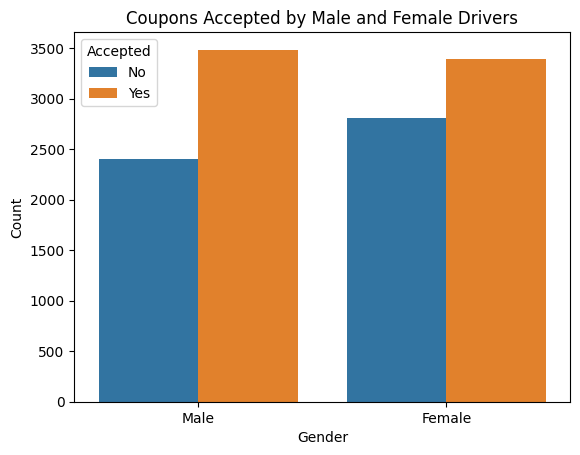

In [923]:
sns.countplot(data_clean, x='gender', hue='Y')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.title('Coupons Accepted by Male and Female Drivers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('images/gender_acceptance.png')

Male drivers are more likely to accept coupons.



Does the destination play a role in coupon acceptance?

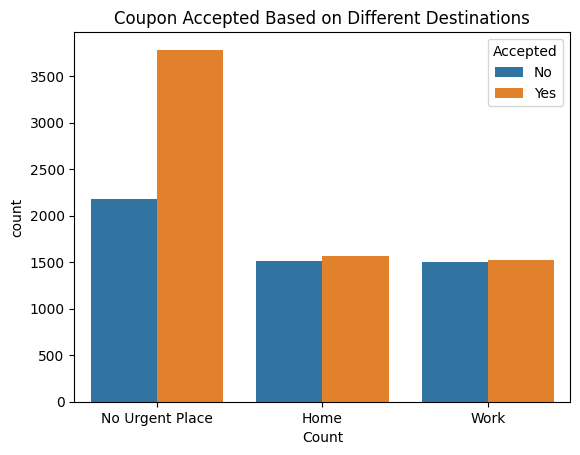

In [924]:
sns.countplot(data_clean, x='destination', hue='Y')
plt.title("Coupon Accepted Based on Different Destinations")
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.xlabel('')
plt.xlabel('Count')
plt.savefig('images/destination_acceptance.png')

Drivers who are headed to a non-urgent destination are most likely to accept a coupon.

Among drivers who are headed to a non-urgent destination, is there a gender-based difference in coupon acceptance?

In [925]:
data_clean['destination'].unique()
No_urgent_place = data_clean[data_clean['destination'] == 'No Urgent Place']
No_urgent_place_male = No_urgent_place.query('(gender == "Male")')
No_urgent_place_male_accepted = No_urgent_place_male.query('(Y == 1)')
ratio_male = (No_urgent_place_male_accepted.shape[0]/No_urgent_place_male.shape[0])*100

No_urgent_place_female = No_urgent_place.query('(gender == "Female")')
No_urgent_place_female_accepted = No_urgent_place_female.query('(Y == 1)')
ratio_female = (No_urgent_place_female_accepted.shape[0]/No_urgent_place_female.shape[0])*100

gender_ratio = round(ratio_male/ratio_female, 2)

print('Male vs. female coupon acceptance ratio during a leisure drive:', gender_ratio)
print('Male drivers are approx. as likely as female drivers to accept coupons during a leisure drive.')

Male vs. female coupon acceptance ratio during a leisure drive: 1.04
Male drivers are approx. as likely as female drivers to accept coupons during a leisure drive.
